# Import Library

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [37]:
#from google.colab import drive
#drive.mount('/content/drive')

In [38]:
pd.set_option('display.max_columns', None)

# Load Dataset

In [39]:
td = pd.read_csv('fraudTrain.csv')

td.info()
td.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# EDA

## Data Type Categories

In [40]:
# Action Items : Drop Kolom
indetifer = ['cc_num', 'first', 'last', 'trans_num']

# Action Items : New Features, OHE , Label Encoder (bertingkat), Grouping into a bigger group OR nunique more than 20 then drop
category = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time']

# Action Items : New Features = Distance
location = ['lat', 'long', 'merch_lat', 'merch_long']

# Action Items : New Features = Risk Time, Risk Day, Age
datetime = ['trans_date_trans_time', 'dob']

# Action Items : New Features : city_pop category, amt category
numerical = ['amt', 'city_pop']

# Action Items : Target Variabel to Modelling
target = ['is_fraud']

## Fraud Category Distribution

In [41]:
td['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

Artinya data ini dalah data Imbalance

## ETC EDA

# Preprocessing Data

## Drop Identifier

In [42]:
# # Drop kolom identity
# td.drop(columns= indetifer,
#               inplace=True)
# td.head()

## Checking Data Duplicates

In [43]:
# cek data duplicated
td.duplicated().sum()

0

## Checking Missing Value (Optional)

In [44]:
# Cek Missing value
td.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Data Imputation (Optional)

## Feature Engineering / New Feature + Label Encoder Manually

### Time Category

#### By Hour

Fraud Data: 7506 Non Fraud: 1289169 Percent Fraud: 0.5789%


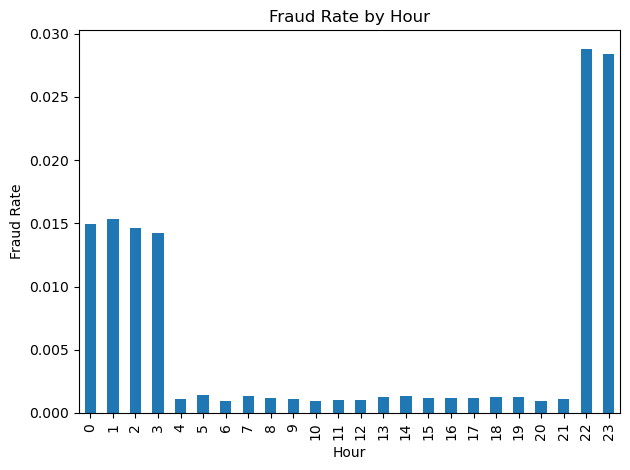

In [45]:
cntFraud = (td['is_fraud'] == 1).sum()
cntNonFraud = (td['is_fraud'] == 0).sum()
pctFraud = round(cntFraud / (cntFraud + cntNonFraud) * 100 , 4)

print('Fraud Data: ' + str(cntFraud), 'Non Fraud: ' + str(cntNonFraud), 'Percent Fraud: ' + str(pctFraud) + '%')

#Analisa dulu kolom per kolom
#Konversi kolom datetime ke hour
td['trans_date_trans_time'] = pd.to_datetime(td['trans_date_trans_time'])
td['hour'] = td['trans_date_trans_time'].dt.hour
td['is_fraud'] = td['is_fraud'].astype(int)

# Grouping dan kalkulasi fraud rate per jam
fraud_by_hour = td.groupby(['hour', 'is_fraud']).size().unstack(fill_value=0)
fraud_by_hour['fraud_rate'] = fraud_by_hour[1] / (fraud_by_hour[0] + fraud_by_hour[1])

# Plot
fraud_by_hour['fraud_rate'].plot(kind='bar', title='Fraud Rate by Hour', ylabel='Fraud Rate', xlabel='Hour')
plt.tight_layout()
plt.show()

Jam 22-3 lebih rawan terjadi fraud

#### By Day of Week

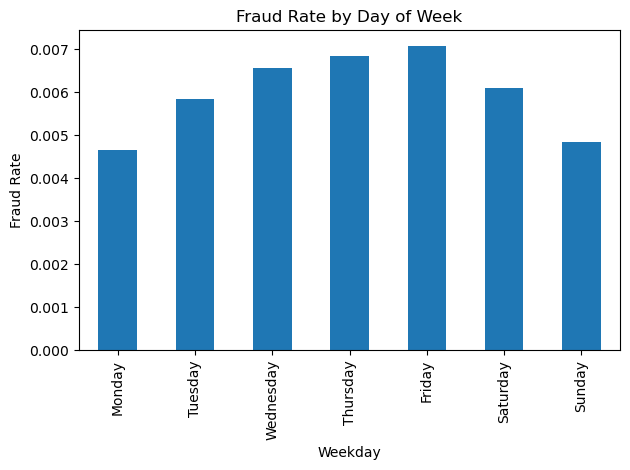

In [46]:
# Extract day of week
td['weekday'] = td['trans_date_trans_time'].dt.day_name()
td['is_fraud'] = td['is_fraud'].astype(int)

# Group by weekday and calculate fraud rate
fraud_by_day = td.groupby(['weekday', 'is_fraud']).size().unstack(fill_value=0)
fraud_by_day['fraud_rate'] = fraud_by_day[1] / (fraud_by_day[0] + fraud_by_day[1])

# Reorder days for consistent display
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day = fraud_by_day.reindex(weekday_order)

# Plot
fraud_by_day['fraud_rate'].plot(kind='bar', title='Fraud Rate by Day of Week', ylabel='Fraud Rate', xlabel='Weekday')
plt.tight_layout()
plt.show()

Sebaran data fraud berdasarkan DayOfWeek cukup rata

#### By Second

📊 Statistik Selisih Detik Berdasarkan is_fraud:
              count          mean           std      min      25%      50%  \
is_fraud                                                                     
0         1289169.0 -61619.050412  39076.588469 -86400.0 -86400.0 -86400.0   
1            7506.0 -56368.345324  41146.813271 -86400.0 -86400.0 -86400.0   

          75%  max  
is_fraud            
0         0.0  0.0  
1         0.0  0.0  


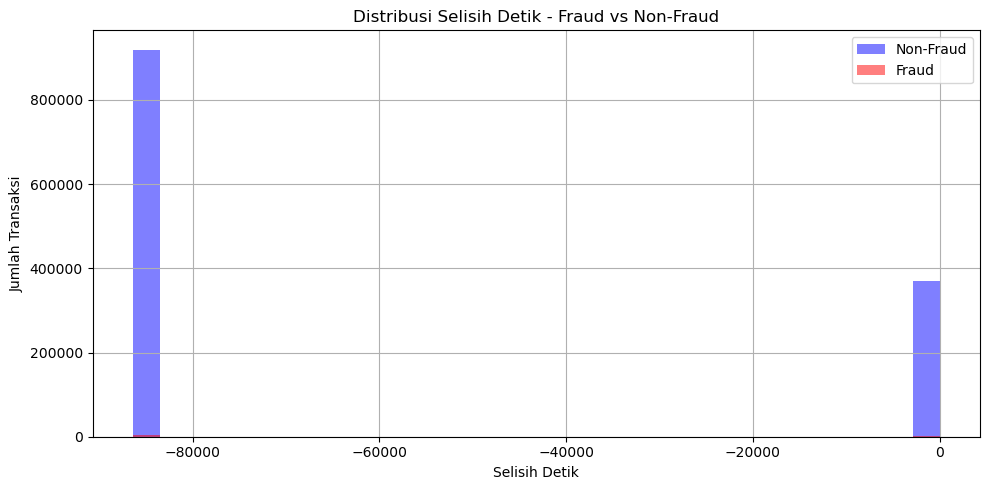

In [47]:
# Convert columns to datetime
td['trans_date_trans_time'] = pd.to_datetime(td['trans_date_trans_time'])
td['unix_original_dt'] = pd.to_datetime(td['unix_time'], unit='s')

# Hitung selisih waktu dalam detik
td['time_diff_sec'] = (td['trans_date_trans_time'] - td['unix_original_dt']).dt.total_seconds()

# Koreksi unix_time dengan menambahkan 7 tahun dalam detik
offset_seconds = (int(5 * 365 * 24 * 60 * 60)) +  (int(2 * 366 * 24 * 60 * 60)) # 7 tahun
td['unix_time_corrected'] = td['unix_time'] + offset_seconds
td['unix_corrected_dt'] = pd.to_datetime(td['unix_time_corrected'], unit='s')

# Cek kecocokan setelah koreksi
td['waktu_sama'] = td['trans_date_trans_time'] == td['unix_corrected_dt']
waktu_sama_persen = td['waktu_sama'].mean() * 100

# Hitung selisih waktu dalam detik
td['selisih_detik'] = (td['trans_date_trans_time'] - td['unix_corrected_dt']).dt.total_seconds()

# Statistik selisih berdasarkan fraud
print("📊 Statistik Selisih Detik Berdasarkan is_fraud:")
print(td.groupby('is_fraud')['selisih_detik'].describe())

# Plot distribusi selisih detik
plt.figure(figsize=(10, 5))
td[td['is_fraud'] == 0]['selisih_detik'].hist(alpha=0.5, label='Non-Fraud', bins=30, color='blue')
td[td['is_fraud'] == 1]['selisih_detik'].hist(alpha=0.5, label='Fraud', bins=30, color='red')
plt.title("Distribusi Selisih Detik - Fraud vs Non-Fraud")
plt.xlabel("Selisih Detik")
plt.ylabel("Jumlah Transaksi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Credit Dard

In [48]:
# Filter only fraud transactions
fraud_only = td[td['is_fraud'] == 1]

# Group by credit card number and count
fraud_by_card = fraud_only.groupby('cc_num').size().reset_index(name='fraud_count')

# Sort by most frequent fraudulent cards
fraud_by_card = fraud_by_card.sort_values(by='fraud_count', ascending=False)
print(fraud_by_card)

                  cc_num  fraud_count
364     3520550088202337           19
89         4593569795412           19
73         4260128500325           18
121       30074693890476           16
340     2720433095629877           16
..                   ...          ...
622     6011109736646996            2
733  4503101193493052864            2
460     3576431665303017            2
695  4089096483689733451            2
109        4809701904914            2

[762 rows x 2 columns]


### Merchant

<bound method NDFrame.head of                               merchant  fraud_count
486                 fraud_Rau and Sons           49
334                  fraud_Kozey-Boehm           48
105                  fraud_Cormier LLC           48
146                    fraud_Doyle Ltd           47
632              fraud_Vandervort-Funk           47
..                                 ...          ...
135                    fraud_Dicki Ltd            1
353                   fraud_Kuphal-Toy            1
129                  fraud_Deckow-Dare            1
120                   fraud_Dach-Borer            1
493  fraud_Reichel, Bradtke and Blanda            1

[679 rows x 2 columns]>
is_fraud                                  0   1  fraud_rate
merchant                                                   
fraud_Kozey-Boehm                      1818  48    0.025723
fraud_Herman, Treutel and Dickens      1267  33    0.025385
fraud_Kerluke-Abshire                  1797  41    0.022307
fraud_Brown PLC      

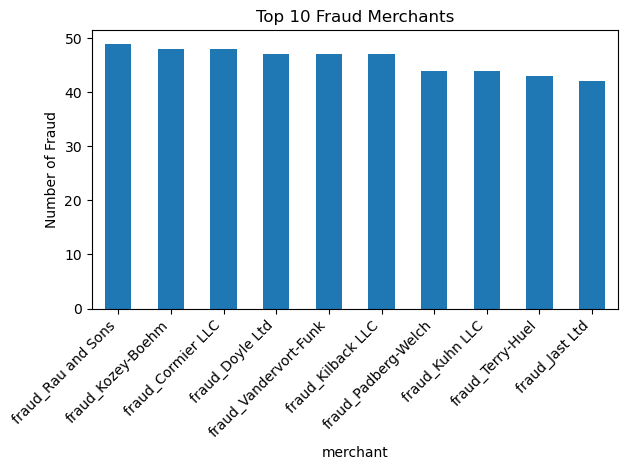

In [49]:
fraud_merchants = td[td['is_fraud'] == 1].groupby('merchant').size().reset_index(name='fraud_count')
fraud_merchants = fraud_merchants.sort_values(by='fraud_count', ascending=False)
print(fraud_merchants.head)

merchant_stats = td.groupby(['merchant', 'is_fraud']).size().unstack(fill_value=0)
merchant_stats['fraud_rate'] = merchant_stats[1] / (merchant_stats[0] + merchant_stats[1])
merchant_stats = merchant_stats.sort_values(by='fraud_rate', ascending=False)
print(merchant_stats)

fraud_merchants.head(10).plot(kind='bar', x='merchant', y='fraud_count', title='Top 10 Fraud Merchants', legend=False)
plt.ylabel('Number of Fraud')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Category

          category  fraud_count
4      grocery_pos         1743
11    shopping_net         1713
8         misc_net          915
12    shopping_pos          843
2    gas_transport          618
9         misc_pos          250
7        kids_pets          239
0    entertainment          233
10   personal_care          220
6             home          198
1      food_dining          151
3      grocery_net          134
5   health_fitness          133
13          travel          116
is_fraud             0     1  fraud_rate
category                                
shopping_net     95830  1713    0.017561
misc_net         62372   915    0.014458
grocery_pos     121895  1743    0.014098
shopping_pos    115829   843    0.007225
gas_transport   131041   618    0.004694
misc_pos         79405   250    0.003139
grocery_net      45318   134    0.002948
travel           40391   116    0.002864
entertainment    93781   233    0.002478
personal_care    90538   220    0.002424
kids_pets       112796   239

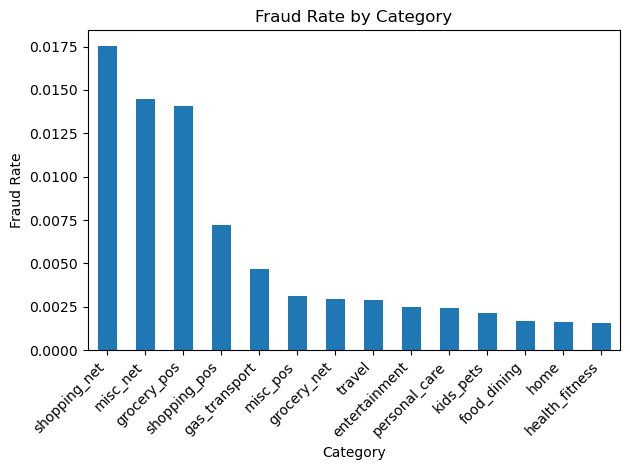

In [50]:
fraud_by_category = td[td['is_fraud'] == 1].groupby('category').size().reset_index(name='fraud_count')
fraud_by_category = fraud_by_category.sort_values(by='fraud_count', ascending=False)
print(fraud_by_category)

cat_stats = td.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
cat_stats['fraud_rate'] = cat_stats[1] / (cat_stats[0] + cat_stats[1])
cat_stats = cat_stats.sort_values(by='fraud_rate', ascending=False)
print(cat_stats)

cat_stats['fraud_rate'].plot(kind='bar', title='Fraud Rate by Category', ylabel='Fraud Rate', xlabel='Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### First and Last Name

In [51]:
fraud_first_names = td[td['is_fraud'] == 1]['first'].value_counts().head(10)
print(fraud_first_names)

total_first_names = td['first'].value_counts()
fraud_name_ratio = (fraud_first_names / total_first_names).sort_values(ascending=False)
print(fraud_name_ratio.head(10))
print('==========================')

# Frequency encoding
name_freq = td['first'].value_counts().to_dict()
td['first_freq'] = td['first'].map(name_freq)

fraud_last_names = td[td['is_fraud'] == 1]['last'].value_counts().head(10)
print(fraud_last_names)

last_name_freq = td['last'].value_counts().to_dict()
td['last_freq'] = td['last'].map(last_name_freq)

first
Christopher    163
Robert         162
David          140
Jennifer       123
James          118
Michael        111
Jessica        104
William         98
Amanda          95
John            94
Name: count, dtype: int64
first
Robert         0.007477
Jennifer       0.007261
Amanda         0.007137
David          0.007012
Christopher    0.006112
William        0.005986
James          0.005889
John           0.005758
Michael        0.005548
Jessica        0.005053
Name: count, dtype: float64
last
Johnson      158
Smith        140
Davis        135
Martinez     131
Jones        120
Williams     108
Thomas       106
Rodriguez     96
Garcia        80
Lewis         73
Name: count, dtype: int64


### Gender

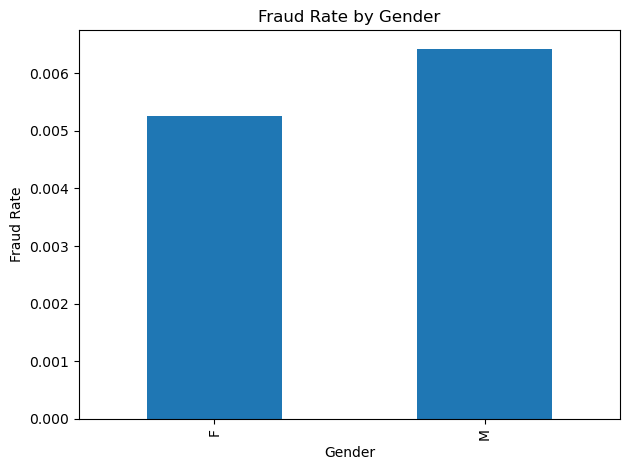

In [52]:
gender_stats = td.groupby('gender')['is_fraud'].agg(['count', 'sum'])
gender_stats['fraud_rate'] = gender_stats['sum'] / gender_stats['count']

gender_stats['fraud_rate'].plot(kind='bar', title='Fraud Rate by Gender', ylabel='Fraud Rate', xlabel='Gender')
plt.tight_layout()
plt.show()

### City

In [53]:
fraud_by_city = td[td['is_fraud'] == 1]['city'].value_counts().head(10)
print(fraud_by_city)
print('==========================')

city_stats = td.groupby(['city', 'is_fraud']).size().unstack(fill_value=0)
city_stats['fraud_rate'] = city_stats[1] / (city_stats[0] + city_stats[1])
city_stats = city_stats.sort_values(by='fraud_rate', ascending=False)
print(city_stats.head(10))

city_freq = td['city'].value_counts().to_dict()
td['city_freq'] = td['city'].map(city_freq)

city
Houston       39
Warren        33
Huntsville    29
Naples        29
Dallas        27
Tulsa         27
Topeka        27
Detroit       26
Utica         25
Randolph      25
Name: count, dtype: int64
is_fraud    0   1  fraud_rate
city                         
Buellton    0   8         1.0
Winnsboro   0  11         1.0
Ashland     0  10         1.0
Clinton     0  12         1.0
Grenola     0   9         1.0
East China  0   9         1.0
Queen Anne  0  13         1.0
Wartburg    0  11         1.0
Claypool    0   7         1.0
Waukau      0  10         1.0


### State

state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
Name: count, dtype: int64
is_fraud      0    1  fraud_rate
state                           
DE            0    9    1.000000
RI          535   15    0.027273
AK         2084   36    0.016981
NV         5560   47    0.008382
CO        13767  113    0.008141
OR        18448  149    0.008012
TN        17414  140    0.007975
NE        23988  180    0.007448
ME        16386  119    0.007210
NH         8219   59    0.007127


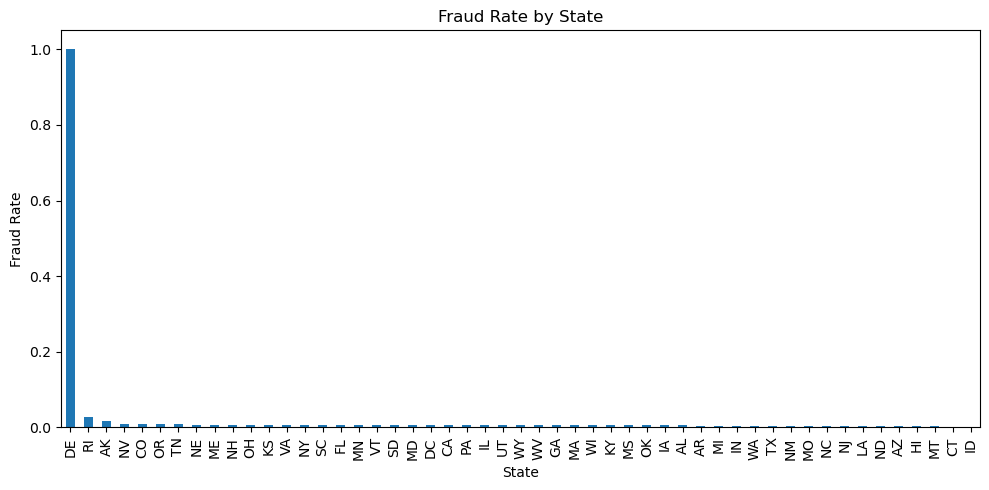

In [54]:
fraud_by_state = td[td['is_fraud'] == 1]['state'].value_counts().head(10)
print(fraud_by_state)
print('==========================')

state_stats = td.groupby(['state', 'is_fraud']).size().unstack(fill_value=0)
state_stats['fraud_rate'] = state_stats[1] / (state_stats[0] + state_stats[1])
state_stats = state_stats.sort_values(by='fraud_rate', ascending=False)
print(state_stats.head(10))

state_stats['fraud_rate'].plot(kind='bar', figsize=(10, 5), title='Fraud Rate by State')
plt.ylabel('Fraud Rate')
plt.xlabel('State')
plt.tight_layout()
plt.show()

### Zip Code

In [55]:
fraud_by_zip = td[td['is_fraud'] == 1]['zip'].value_counts().head(10)
print(fraud_by_zip)
print('==========================')

zip_stats = td.groupby(['zip', 'is_fraud']).size().unstack(fill_value=0)
zip_stats['fraud_rate'] = zip_stats[1] / (zip_stats[0] + zip_stats[1])
zip_stats = zip_stats[zip_stats.sum(axis=1) >= 50]  # filter ZIPs with at least 50 transactions
zip_stats = zip_stats.sort_values(by='fraud_rate', ascending=False)
print(zip_stats.head(10))

zip_freq = td['zip'].value_counts().to_dict()
td['zip_freq'] = td['zip'].map(zip_freq)

zip
15010    24
48088    23
16034    21
82514    21
68375    19
55606    19
95148    18
41812    18
34112    18
33760    16
Name: count, dtype: int64
is_fraud    0   1  fraud_rate
zip                          
52760     500  16    0.031008
59632     478  15    0.030426
48193     489  15    0.029762
12092     489  15    0.029762
33760     529  16    0.029358
97107     496  15    0.029354
30426     499  15    0.029183
24986     514  15    0.028355
39572     514  15    0.028355
11955     488  14    0.027888


### Distance

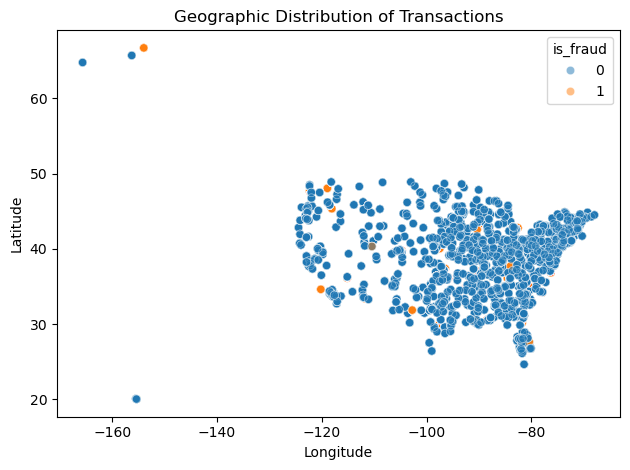

In [56]:
sns.scatterplot(data=td, x='long', y='lat', hue='is_fraud', alpha=0.5)
plt.title("Geographic Distribution of Transactions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [57]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

td['distance_to_merchant_km'] = haversine(td['lat'], td['long'], td['merch_lat'], td['merch_long'])
print(td.head(10))

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   
7           7   2019-01-01 00:05:08  6011360759745864   
8           8   2019-01-01 00:05:18  4922710831011201   
9           9   2019-01-01 00:06:01  2720830304681674   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy 

### City Population

            count   sum  fraud_rate
pop_bin                            
<1k        398055  2299    0.005776
1k–10k     509556  2865    0.005623
10k–50k    146390   908    0.006203
50k–100k    63800   258    0.004044
100k–500k  113165   767    0.006778
500k+       65709   409    0.006224


C:\Users\tisna\AppData\Local\Temp\ipykernel_22720\3384632384.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_stats = td.groupby('pop_bin')['is_fraud'].agg(['count', 'sum'])


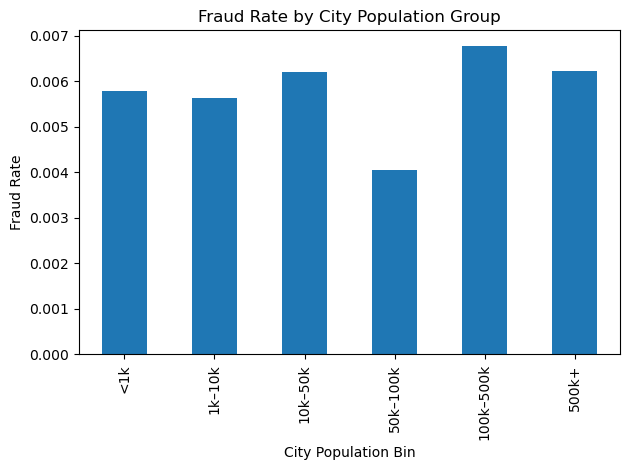

In [58]:
td['pop_bin'] = pd.cut(td['city_pop'], bins=[0, 1000, 10000, 50000, 100000, 500000, 1e7],
                       labels=['<1k', '1k–10k', '10k–50k', '50k–100k', '100k–500k', '500k+'])

# Fraud rate per population bin
pop_stats = td.groupby('pop_bin')['is_fraud'].agg(['count', 'sum'])
pop_stats['fraud_rate'] = pop_stats['sum'] / pop_stats['count']
print(pop_stats)

import matplotlib.pyplot as plt

pop_stats['fraud_rate'].plot(kind='bar', title='Fraud Rate by City Population Group', xlabel='City Population Bin', ylabel='Fraud Rate')
plt.tight_layout()
plt.show()

### Job

In [59]:
fraud_jobs = td[td['is_fraud'] == 1]['job'].value_counts().head(10)
print(fraud_jobs)

job_stats = td.groupby(['job', 'is_fraud']).size().unstack(fill_value=0)
job_stats['fraud_rate'] = job_stats[1] / (job_stats[0] + job_stats[1])
job_stats = job_stats[job_stats.sum(axis=1) >= 50]  # only keep jobs with 50+ transactions
job_stats = job_stats.sort_values(by='fraud_rate', ascending=False)
print(job_stats.head(10))

# Frequency encoding
job_freq = td['job'].value_counts().to_dict()
td['job_freq'] = td['job'].map(job_freq)

job
Materials engineer                       62
Trading standards officer                56
Naval architect                          53
Exhibition designer                      51
Surveyor, land/geomatics                 50
Mechanical engineer                      49
Prison officer                           48
Quantity surveyor                        48
Audiological scientist                   46
Senior tax professional/tax inspector    45
Name: count, dtype: int64
is_fraud                        0   1  fraud_rate
job                                              
Lawyer                        512  28    0.051852
TEFL teacher                  511  22    0.041276
Community development worker  514  22    0.041045
Clinical cytogeneticist       490  18    0.035433
Writer                        489  15    0.029762
Geneticist, molecular         529  16    0.029358
Conservator, museum/gallery   499  15    0.029183
Magazine journalist           519  14    0.026266
Field trials officer          

### Age

            count   sum  fraud_rate
age_group                          
<=55       953899  4884    0.005120
55+        342776  2622    0.007649


C:\Users\tisna\AppData\Local\Temp\ipykernel_22720\4237743001.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = td.groupby('age_group')['is_fraud'].agg(['count', 'sum'])


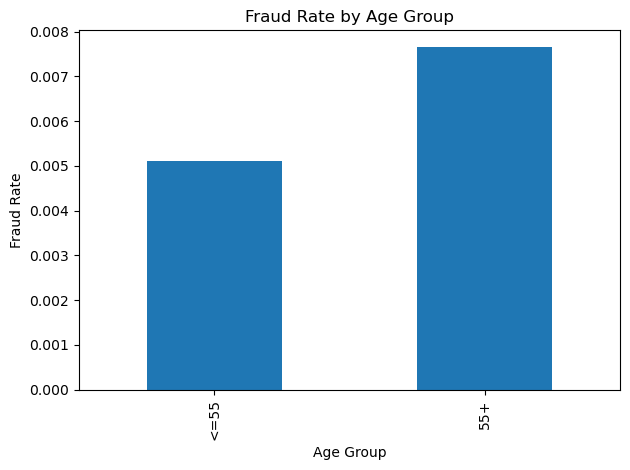

In [60]:
# Convert to datetime
td['dob'] = pd.to_datetime(td['dob'])
td['trans_date_trans_time'] = pd.to_datetime(td['trans_date_trans_time'])  # in case not done earlier

# Calculate age
td['age'] = (td['trans_date_trans_time'] - td['dob']).dt.days // 365

# Create age bins
td['age_group'] = pd.cut(td['age'], bins=[0, 55, 100],
                         labels=['<=55', '55+'])

# Compute fraud rate per age group
age_stats = td.groupby('age_group')['is_fraud'].agg(['count', 'sum'])
age_stats['fraud_rate'] = age_stats['sum'] / age_stats['count']
print(age_stats)

age_stats['fraud_rate'].plot(kind='bar', title='Fraud Rate by Age Group', xlabel='Age Group', ylabel='Fraud Rate')
plt.tight_layout()
plt.show()

In [61]:
print("Fraudulent Transactions:")
print(td[td['is_fraud'] == 1]['amt'].describe())

print("\nNon-Fraudulent Transactions:")
print(td[td['is_fraud'] == 0]['amt'].describe())

Fraudulent Transactions:
count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

Non-Fraudulent Transactions:
count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64


### ETC FE

Final Fitur yang akan digunakan

In [62]:
# Fitur jam (risk encoding)
td['hour'] = td['trans_date_trans_time'].dt.hour
def encode_jam(hour):
    if 22 <= hour <= 23:
        return 3
    elif 0 <= hour <= 3:
        return 2
    else:
        return 1
td['jam_risk'] = td['hour'].apply(encode_jam)

# Fitur category encoding
def encode_category(cat):
    if cat == 'shopping_net':
        return 4
    elif cat in ['misc_net', 'grocery_pos']:
        return 3
    elif cat in ['shopping_pos', 'gas_transport']:
        return 2
    else:
        return 1
td['category_encoded'] = td['category'].apply(encode_category)

# Hitung distance (haversine)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

td['distance'] = haversine(td['lat'], td['long'], td['merch_lat'], td['merch_long'])

# Amount Outlier Flag
def identify_outliers(group):
    q1 = group['amt'].quantile(0.25)
    q3 = group['amt'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (group['amt'] < lower) | (group['amt'] > upper)

outlier_mask = td.groupby('category', group_keys=False).apply(identify_outliers)
td['amt_outlier_flag'] = outlier_mask.replace({True: 2, False: 1}).values

# Age Risk Score
td['age_risk_score'] = td['age'].apply(lambda x: 2 if x >= 55 else 1)

C:\Users\tisna\AppData\Local\Temp\ipykernel_22720\1143322161.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outlier_mask = td.groupby('category', group_keys=False).apply(identify_outliers)
C:\Users\tisna\AppData\Local\Temp\ipykernel_22720\1143322161.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  td['amt_outlier_flag'] = outlier_mask.replace({True: 2, False: 1}).values


# Train Test Split

Pemilihan kolom Fitur dilakukan berdasarkan pengamatan visual hasil dari grafik Feature Engineering

Jangan lupa pakai stratify = y

In [63]:
# fitur = ['jam_risk', 'category_encoded', 'amt', 'distance', 'risk_category_of_hour', 'job_freq', 'age']
# fitur = ['jam_risk', 'category_encoded', 'amt', 'distance', 'risk_category_of_hour', 'age', 'city_size_type', 'gender_group']

#fitur = ['jam_risk', 'category_encoded', 'amt', 'distance', 'risk_category_of_hour', 'age']

fitur = ['jam_risk', 'category_encoded', 'amt', 'distance', 'amt_outlier_flag', 'age_risk_score']
x = td[fitur]
y = td['is_fraud']

# Split data (stratify agar proporsi fraud tetap)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

## Original Data

In [64]:
print("Distribusi y_train:\n", y_train.value_counts(normalize=True))
print('=========================================')
print("Distribusi y_test:\n", y_test.value_counts(normalize=True))

Distribusi y_train:
 is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64
Distribusi y_test:
 is_fraud
0    0.994212
1    0.005788
Name: proportion, dtype: float64


## Handling Imbalance Data (Training Data)

Hanya data train aja yang boleh di Handling Imbalance

### SMOTE

In [65]:
# Buat SMOTE object
smote = SMOTE(random_state=42)

# Terapkan hanya pada data latih
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek hasil
print("Sebelum SMOTE:", y_train.value_counts())
print("\n============================================")
print("Setelah SMOTE:", y_train_smote.value_counts())

Sebelum SMOTE: is_fraud
0    1031335
1       6005
Name: count, dtype: int64

Setelah SMOTE: is_fraud
0    1031335
1    1031335
Name: count, dtype: int64


In [66]:
# X_train_smote['age_risk_score'].fillna(X_train_smote['age_risk_score'].mode()[0], inplace=True)

# X_train_smote.isnull().sum()


### ADASYN

In [67]:
# Buat objek ADASYN
adasyn = ADASYN(random_state=42)

# Terapkan hanya pada data training
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Cek distribusi hasil balancing
print("Sebelum ADASYN:\n", y_train.value_counts())
print("Setelah ADASYN:\n", y_train_adasyn.value_counts())

Sebelum ADASYN:
 is_fraud
0    1031335
1       6005
Name: count, dtype: int64
Setelah ADASYN:
 is_fraud
1    1031951
0    1031335
Name: count, dtype: int64


In [68]:
# X_train_adasyn['city_size_type'].fillna(X_train_adasyn['city_size_type'].mode()[0], inplace=True)

# X_train_adasyn.isnull().sum()

# Modelling

## Logistics Regression

In [69]:
lr_model = LogisticRegression(max_iter=100, class_weight='balanced')
lr_model_adasyn = LogisticRegression(max_iter=100)
lr_model_smote = LogisticRegression(max_iter=100)

lr_model.fit(X_train, y_train)
lr_model_smote.fit(X_train_smote, y_train_smote)
lr_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluasi tetap dilakukan di test set asli (X_test, y_test)
lr_y_pred = lr_model.predict(X_test)
lr_y_pred_smote = lr_model_smote.predict(X_test)
lr_y_pred_adasyn = lr_model_adasyn.predict(X_test)

print("Akurasi tanpa Handling Imbalance :", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))
print('=======================================================')
print("Akurasi dengan Handling Imbalance SMOTE :", accuracy_score(y_test, lr_y_pred_smote))
print(classification_report(y_test, lr_y_pred_smote))
print('=======================================================')
print("Akurasi dengan Handling Imbalance ADASYN :", accuracy_score(y_test, lr_y_pred_adasyn))
print(classification_report(y_test, lr_y_pred_adasyn))

c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Akurasi tanpa Handling Imbalance : 0.8679275840129562
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    257834
           1       0.04      0.84      0.07      1501

    accuracy                           0.87    259335
   macro avg       0.52      0.85      0.50    259335
weighted avg       0.99      0.87      0.92    259335

Akurasi dengan Handling Imbalance SMOTE : 0.8844274779725066
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    257834
           1       0.04      0.82      0.08      1501

    accuracy                           0.88    259335
   macro avg       0.52      0.85      0.51    259335
weighted avg       0.99      0.88      0.93    259335

Akurasi dengan Handling Imbalance ADASYN : 0.8558813889370891
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    257834
           1       0.03      0.84      0.06      1501

    a

c:\Users\tisna\anaconda3\envs\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter Tuning (Optional)

In [70]:
# Pipeline: scaling + logistic regression (karena logistic regression sensitif terhadap skala fitur)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=100))  # liblinear cocok untuk dataset kecil/imbalance
])

# Parameter grid
param_grid = {
    'logreg__penalty': ['l1', 'l2'],             # Jenis regularisasi
    'logreg__C': [0.01, 0.1],        # Regularisasi: makin kecil = makin kuat regularisasinya
    'logreg__class_weight': [None, 'balanced']   # Untuk data imbalance
}

# GridSearchCV
lr_grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',     # digunakan agar model fokus pada deteksi Fraud (positif minoritas), karena data tidak seimbang
    cv=2,
    n_jobs=-1,
    verbose=1
)
lr_grid_search_smote = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',     # digunakan agar model fokus pada deteksi Fraud (positif minoritas), karena data tidak seimbang
    cv=2,
    n_jobs=-1,
    verbose=1
)
lr_grid_search_adasyn = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',     # digunakan agar model fokus pada deteksi Fraud (positif minoritas), karena data tidak seimbang
    cv=2,
    n_jobs=-1,
    verbose=1
)


lr_grid_search.fit(X_train, y_train)
lr_grid_search_smote.fit(X_train_smote, y_train_smote)
lr_grid_search_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Output hasil terbaik
print("\nTanpa Handling Imbalance")
print("Best Parameters :", lr_grid_search.best_params_)
print("Best Score :", lr_grid_search.best_score_)
print('=======================================================\n')
print("Dengan Handling Imbalance SMOTE")
print("Best Parameters :", lr_grid_search_smote.best_params_)
print("Best Score :", lr_grid_search_smote.best_score_)
print('=======================================================\n')
print("Dengan Handling Imbalance ADASYN")
print("Best Parameters :", lr_grid_search_adasyn.best_params_)
print("Best Score :", lr_grid_search_adasyn.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Fitting 2 folds for each of 8 candidates, totalling 16 fits

Tanpa Handling Imbalance
Best Parameters : {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__penalty': 'l1'}
Best Score : 0.18147143019632186

Dengan Handling Imbalance SMOTE
Best Parameters : {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__penalty': 'l1'}
Best Score : 0.8483328024931448

Dengan Handling Imbalance ADASYN
Best Parameters : {'logreg__C': 0.1, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2'}
Best Score : 0.8004000696660902


## RandomForest

In [71]:
rf_model = RandomForestClassifier(n_estimators=25, class_weight='balanced', random_state=42)
rf_model_smote = RandomForestClassifier(n_estimators=25, random_state=42)
rf_model_adasyn = RandomForestClassifier(n_estimators=25, random_state=42)

#latih Model
rf_model.fit(X_train, y_train)
rf_model_smote.fit(X_train_smote, y_train_smote)
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Evaluasi tetap dilakukan di test set asli (X_test, y_test)
rf_y_pred = rf_model.predict(X_test)
print("Akurasi tanpa Handling Imbalance :", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))
print('=======================================================')
rf_y_pred_smote = rf_model_smote.predict(X_test)
print("Akurasi dengan Handling Imbalance SMOTE :", accuracy_score(y_test, rf_y_pred_smote))
print(classification_report(y_test, rf_y_pred_smote))
print('=======================================================')
rf_y_pred_adasyn = rf_model_adasyn.predict(X_test)
print("Akurasi dengan Handling Imbalance ADASYN :", accuracy_score(y_test, rf_y_pred_adasyn))
print(classification_report(y_test, rf_y_pred_adasyn))
print('=======================================================')

Akurasi tanpa Handling Imbalance : 0.9965565773998881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.78      0.56      0.66      1501

    accuracy                           1.00    259335
   macro avg       0.89      0.78      0.83    259335
weighted avg       1.00      1.00      1.00    259335

Akurasi dengan Handling Imbalance SMOTE : 0.9819191393371508
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257834
           1       0.21      0.75      0.32      1501

    accuracy                           0.98    259335
   macro avg       0.60      0.86      0.66    259335
weighted avg       0.99      0.98      0.99    259335

Akurasi dengan Handling Imbalance ADASYN : 0.9804307170262402
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257834
           1       0.19      0.75      0.31      1501

    a

### Hyperparameter Tuning (Optional)

In [72]:
# rf_model = RandomForestClassifier(random_state=42)
# rf_model_smote = RandomForestClassifier(random_state=42)
# rf_model_adasyn = RandomForestClassifier(random_state=42)

# # Definisikan ruang parameter yang ingin ditelusuri
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
# }

# # Randomized Search CV
# rf_grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     scoring='f1',      # Gunakan f1 untuk data imbalance, bisa juga 'accuracy', 'roc_auc', dsb
#     cv=5,              # 5-fold cross validation
#     n_jobs=-1,         # Gunakan semua core CPU
#     verbose=1
# )
# rf_grid_search_smote = GridSearchCV(
#     estimator=rf_model_smote,
#     param_grid=param_grid,
#     scoring='f1',      # Gunakan f1 untuk data imbalance, bisa juga 'accuracy', 'roc_auc', dsb
#     cv=5,              # 5-fold cross validation
#     n_jobs=-1,         # Gunakan semua core CPU
#     verbose=1
# )
# rf_grid_search_adasyn = GridSearchCV(
#     estimator=rf_model_adasyn,
#     param_grid=param_grid,
#     scoring='f1',      # Gunakan f1 untuk data imbalance, bisa juga 'accuracy', 'roc_auc', dsb
#     cv=5,              # 5-fold cross validation
#     n_jobs=-1,         # Gunakan semua core CPU
#     verbose=1
# )

# #latih Model
# rf_grid_search.fit(X_train, y_train)
# rf_grid_search_smote.fit(X_train_smote, y_train_smote)
# rf_grid_search_adasyn.fit(X_train_adasyn, y_train_adasyn)

# # Output hasil terbaik
# print("\nTanda Handling Imbalance")
# print("Best Parameters :", rf_grid_search.best_params_)
# print("Best Score :", rf_grid_search.best_score_)
# print('=======================================================\n')
# print("Dengan Handling Imbalance SMOTE")
# print("Best Parameters :", rf_grid_search_smote.best_params_)
# print("Best Score :", rf_grid_search_smote.best_score_)
# print('=======================================================\n')
# print("Dengan Handling Imbalance ADASYN")
# print("Best Parameters :", rf_grid_search_adasyn.best_params_)
# print("Best Score :", rf_grid_search_adasyn.best_score_)

## Others Model (Optional)

# Model Comparison

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    257834
           1       0.04      0.84      0.07      1501

    accuracy                           0.87    259335
   macro avg       0.52      0.85      0.50    259335
weighted avg       0.99      0.87      0.92    259335

ROC AUC : 0.933345319967554

=== Logistic Regression dengan SMOTE ===
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    257834
           1       0.04      0.82      0.08      1501

    accuracy                           0.88    259335
   macro avg       0.52      0.85      0.51    259335
weighted avg       0.99      0.88      0.93    259335

ROC AUC: 0.9147719118990446
=== Logistic Regression dengan ADASYN ===
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    257834
           1       0.03      0.84      0.06      1501

    accuracy  

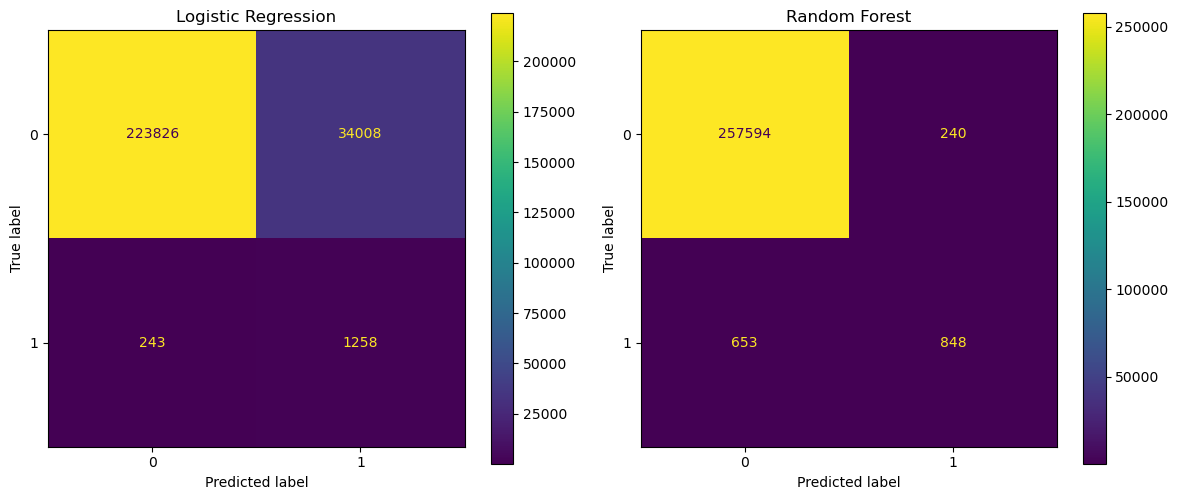

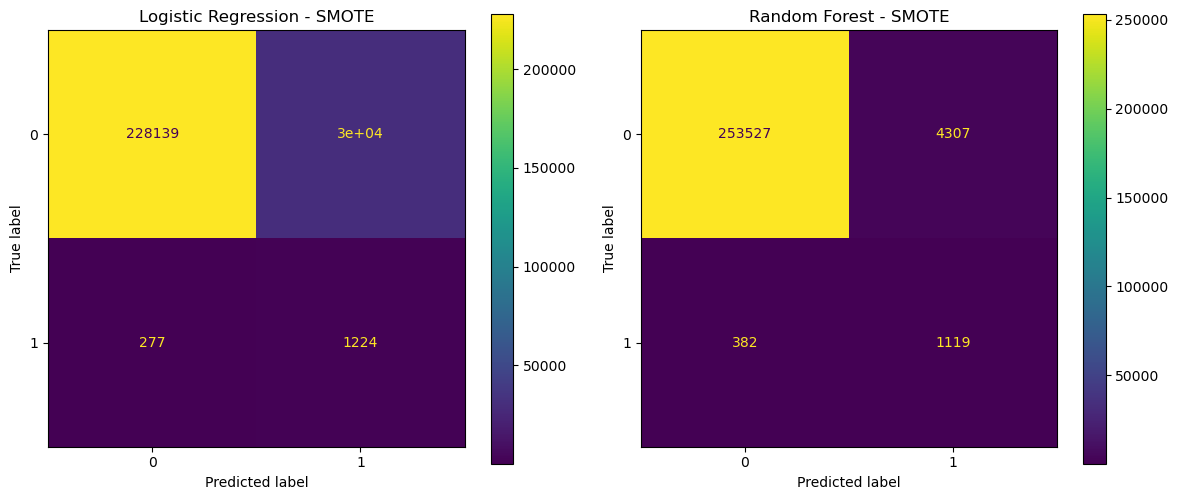

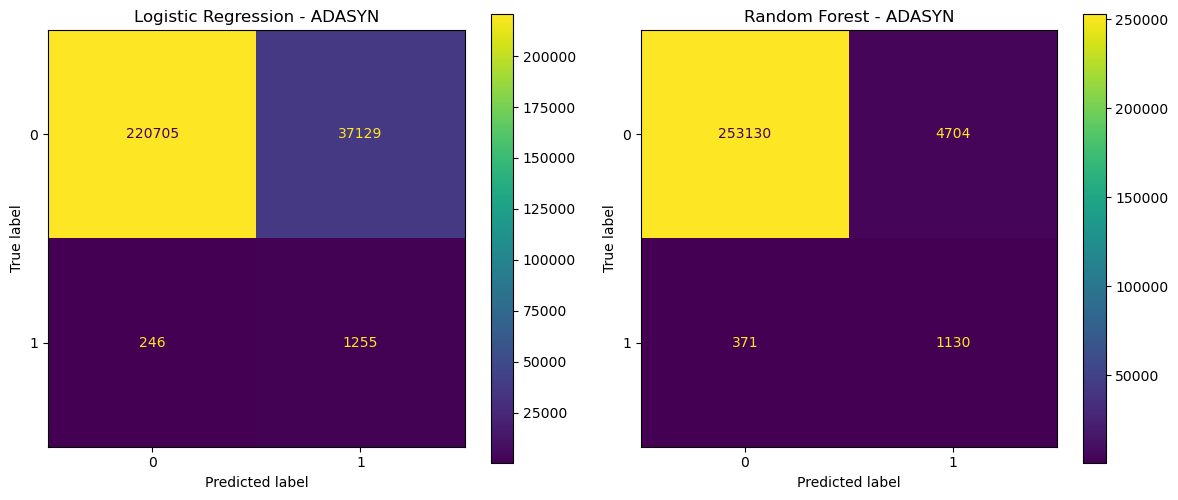

In [73]:
lr_y_proba = lr_model.predict_proba(X_test)[:, 1]
rf_y_proba = rf_model.predict_proba(X_test)[:, 1]

lr_y_proba_smote = lr_model_smote.predict_proba(X_test)[:, 1]
rf_y_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

lr_y_proba_adasyn = lr_model_adasyn.predict_proba(X_test)[:, 1]
rf_y_proba_adasyn = rf_model_adasyn.predict_proba(X_test)[:, 1]

lr_y_proba_hype = lr_grid_search.predict_proba(X_test)[:, 1]
lr_y_proba_hype_smote = lr_grid_search_smote.predict_proba(X_test)[:, 1]
lr_y_proba_hype_adasyn = lr_grid_search_adasyn.predict_proba(X_test)[:, 1]

# ========================================================================

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_y_pred))
print("ROC AUC :", roc_auc_score(y_test, lr_y_proba))

print("\n=== Logistic Regression dengan SMOTE ===")
print(classification_report(y_test, lr_y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, lr_y_proba_smote))

print("=== Logistic Regression dengan ADASYN ===")
print(classification_report(y_test, lr_y_pred_adasyn))
print("ROC AUC:", roc_auc_score(y_test, lr_y_proba_adasyn))

print("\n=== Random Forest ===")
print(classification_report(y_test, rf_y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_y_proba))

print("\n=== Random Forest dengan SMOTE ===")
print(classification_report(y_test, rf_y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, rf_y_proba_smote))

print("\n=== Random Forest dengan ADASYN ===")
print(classification_report(y_test, rf_y_pred_adasyn))
print("ROC AUC:", roc_auc_score(y_test, rf_y_proba_adasyn))

# ===== Hyperparameter Tuning =======

print("\n=== HYPERPARAMETER TUNING ===")
print("=== Logistic Regression ===")
print(classification_report(y_test, lr_y_pred))
print("ROC AUC :", roc_auc_score(y_test, lr_y_proba_hype))

print("\n=== Logistic Regression dengan SMOTE ===")
print(classification_report(y_test, lr_y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, lr_y_proba_hype_smote))

print("=== Logistic Regression dengan ADASYN ===")
print(classification_report(y_test, lr_y_pred_adasyn))
print("ROC AUC:", roc_auc_score(y_test, lr_y_proba_hype_adasyn))

# =======================================================================

# ==== Confusion Matrix ====

# ===== Tanpa Handling Imbalance =====
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, ax=ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, ax=ax[1])
ax[1].set_title("Random Forest")
plt.tight_layout()
plt.show()

# ===== SMOTE =====

figS, axS = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred_smote, ax=axS[0])
axS[0].set_title("Logistic Regression - SMOTE")

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred_smote, ax=axS[1])
axS[1].set_title("Random Forest - SMOTE")
plt.tight_layout()
plt.show()

# ==== ADASYN ====
fig, axA = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred_adasyn, ax=axA[0])
axA[0].set_title("Logistic Regression - ADASYN")

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred_adasyn, ax=axA[1])
axA[1].set_title("Random Forest - ADASYN")
plt.tight_layout()
plt.show()

# Features Importance

## Logistic Regression

Logistic Regression : 
            Feature  Coefficient
0          jam_risk     1.577096
5    age_risk_score     0.266229
1  category_encoded     0.186455
4  amt_outlier_flag    -0.073061
2               amt     0.006871
3          distance    -0.000423

Logistic Regression - SMOTE : 
            Feature  Coefficient
4  amt_outlier_flag    -2.779814
0          jam_risk     1.326067
5    age_risk_score    -0.777167
1  category_encoded     0.011158
2               amt     0.007540
3          distance    -0.000516

Logistic Regression - ADASYN : 
            Feature  Coefficient
4  amt_outlier_flag    -2.878386
0          jam_risk     1.338732
5    age_risk_score    -0.823198
1  category_encoded    -0.105356
2               amt     0.006957
3          distance     0.000200


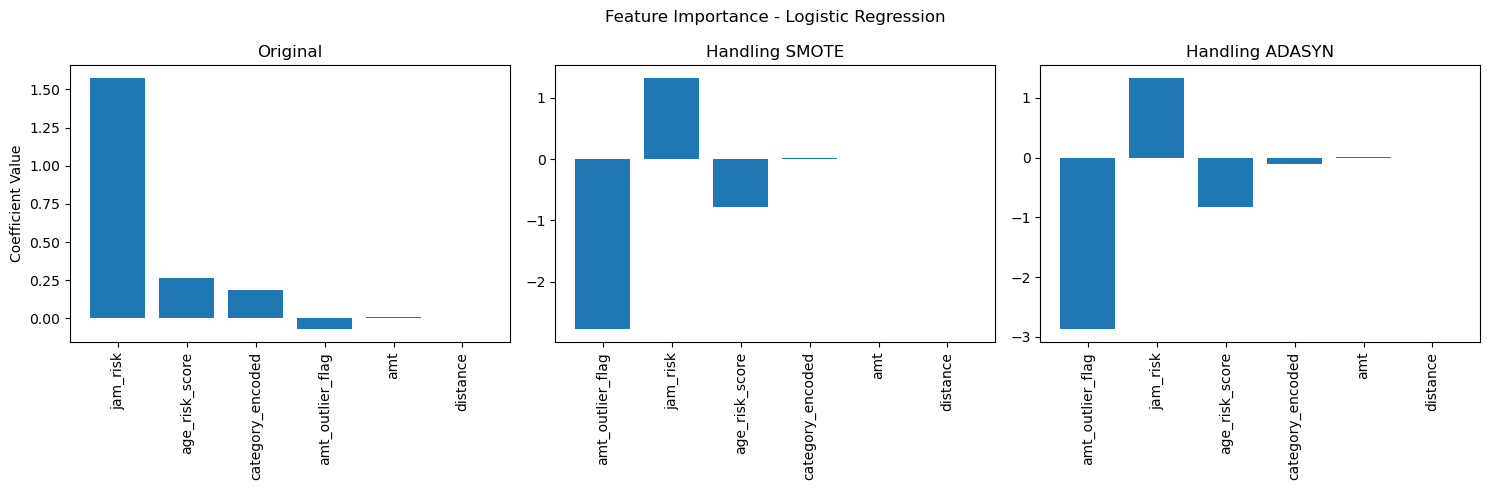

In [74]:
# Logistic Regression

# Ambil koefisien
lr_coef = lr_model.coef_[0]
lr_coef_smote = lr_model_smote.coef_[0]
lr_coef_adasyn = lr_model_adasyn.coef_[0]

features = X_train.columns

# Buat DataFrame untuk visualisasi
lr_dfi = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_coef,
    'Abs_Coefficient': np.abs(lr_coef)
}).sort_values(by='Abs_Coefficient', ascending=False)

lr_dfi_smote = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_coef_smote,
    'Abs_Coefficient': np.abs(lr_coef_smote)
}).sort_values(by='Abs_Coefficient', ascending=False)

lr_dfi_adasyn = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_coef_adasyn,
    'Abs_Coefficient': np.abs(lr_coef_adasyn)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Tampilkan
print("Logistic Regression : ")
print(lr_dfi[['Feature', 'Coefficient']])
print("\n======================================")
print("Logistic Regression - SMOTE : ")
print(lr_dfi_smote[['Feature', 'Coefficient']])
print("\n======================================")
print("Logistic Regression - ADASYN : ")
print(lr_dfi_adasyn[['Feature', 'Coefficient']])

# Visualisasi
# Buat subplots 1 baris 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Grafik 1: Logistic Regression (original)
axes[0].bar(lr_dfi['Feature'], lr_dfi['Coefficient'])
axes[0].set_title("Original")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel("Coefficient Value")

# Grafik 2: Logistic Regression - SMOTE
axes[1].bar(lr_dfi_smote['Feature'], lr_dfi_smote['Coefficient'])
axes[1].set_title("Feature Importance - Logistic Regression\n\nHandling SMOTE")
axes[1].tick_params(axis='x', rotation=90)

# Grafik 3: Logistic Regression - ADASYN
axes[2].bar(lr_dfi_adasyn['Feature'], lr_dfi_adasyn['Coefficient'])
axes[2].set_title("Handling ADASYN")
axes[2].tick_params(axis='x', rotation=90)

# Rapatkan layout
plt.tight_layout()
plt.show()

## Random Forest

Random Forest : 
            Feature  Importance
2               amt    0.606500
0          jam_risk    0.236584
1  category_encoded    0.075560
3          distance    0.074326
5    age_risk_score    0.005709
4  amt_outlier_flag    0.001321

Random Forest - SMOTE : 
            Feature  Importance
2               amt    0.629156
0          jam_risk    0.202186
3          distance    0.082999
1  category_encoded    0.062135
5    age_risk_score    0.013273
4  amt_outlier_flag    0.010251

Random Forest - ADASYN : 
            Feature  Importance
2               amt    0.599311
0          jam_risk    0.219549
3          distance    0.103699
1  category_encoded    0.051958
5    age_risk_score    0.014529
4  amt_outlier_flag    0.010954


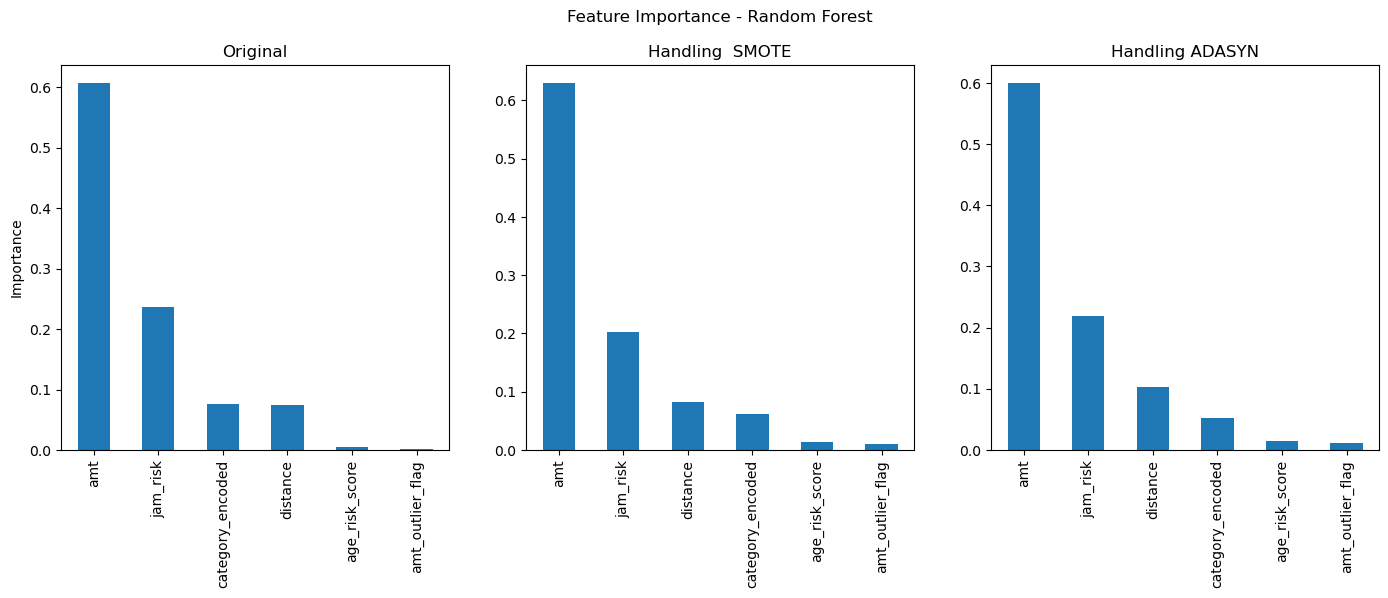

In [75]:
# Random Forest

# Ambil feature importance
fi_rf_ori = rf_model.feature_importances_
fi_rf_smote = rf_model_smote.feature_importances_
fi_rf_adasyn = rf_model_adasyn.feature_importances_

features = X_train.columns

# Buat dan tampilkan DataFrame
rf_dfi = pd.DataFrame({
    'Feature': features,
    'Importance': fi_rf_ori
}).sort_values(by='Importance', ascending=False)

rf_dfi_smote = pd.DataFrame({
    'Feature': features,
    'Importance': fi_rf_smote
}).sort_values(by='Importance', ascending=False)

rf_dfi_adasyn = pd.DataFrame({
    'Feature': features,
    'Importance': fi_rf_adasyn
}).sort_values(by='Importance', ascending=False)

# Tampilkan
print("Random Forest : ")
print(rf_dfi[['Feature', 'Importance']])
print("\n======================================")
print("Random Forest - SMOTE : ")
print(rf_dfi_smote[['Feature', 'Importance']])
print("\n======================================")
print("Random Forest - ADASYN : ")
print(rf_dfi_adasyn[['Feature', 'Importance']])

# Visualisasi Random Forest
fig, axA = plt.subplots(1, 3, figsize=(17, 5))

pd.Series(fi_rf_ori, index=features).sort_values(ascending=False).plot(title="Original", ylabel="Importance", kind='bar', ax=axA[0])
pd.Series(fi_rf_smote, index=features).sort_values(ascending=False).plot(title="Feature Importance - Random Forest\n\nHandling  SMOTE", kind='bar', ax=axA[1])
pd.Series(fi_rf_adasyn, index=features).sort_values(ascending=False).plot(title="Handling ADASYN", kind='bar', ax=axA[2])
plt.show()